<a href="https://colab.research.google.com/github/loosak/pysnippets/blob/master/Titanic_Dataset_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right">Ioannis Karakasoglou Breier</div> 

# Exploratory Analysis of the Titanic Dataset
---
<br/>

![Titanic Ad](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/RMS_Titanic_Ad_April_10%2C_1912.jpg/400px-RMS_Titanic_Ad_April_10%2C_1912.jpg)
<center><a href="https://en.wikipedia.org/wiki/RMS_Titanic">Display ad for Titanic's first but never made sailing from New York on 20 April 1912 </a><br></center>

## Project Overview
---
In this project, I investigate the Titanic Dataset with the use of the Python libraries Scipy, NumPy, Pandas, Matplotlib and Seaborn.

## Dataset Information/ Data Dictionary/Variable Notes
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

[Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

**Variable**|**Definition**	|**Key** 
----------|-----------------|------
Survived  |	Survival	|0 = No, 1 = Yes    
Pclass	  |  Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd 
Sex	       | Sex	
Age	        |Age in years	
Sibsp	    |# of siblings / spouses aboard the Titanic	
Parch	    |# of parents / children aboard the Titanic	
Ticket	    |Ticket number	
Fare	    |Passenger fare	
Cabin	    |Cabin number	
Embarked	|Port of Embarkation |C = Cherbourg, Q = Queenstown,S = Southampton

**Pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**Parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

## Initial Questions & Data Investigation
---

- Did the  Port of Embarkation affect the chances of surviving?.
- How did the other factors influence this?
- Did Age effect the chances of surviving? 

We will load the necessary Python libraries for our analysis and set some parameters:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

### Data Acquisition

In [3]:
#Load the CSV into a Pandas Dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
titanic_data = pd.read_csv(url)

Let's take a first look of our Dataframe using pandas descriptive statitstics functions

In [4]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We observe that there are missing values at the Age, Cabin and Embarked columns.

### Data Cleaning

Since most of `Cabin` column values are missing we will omit this column along with the `Ticket`, `Fare`, `PassengerId` and `Name` columns that we will not use for this initial investigation. We will make a new Dataframe in case we want to access the initial one again.

In [6]:
#Drop the unwanted columns
n_titanic_data = titanic_data.drop(['Cabin', 'Ticket', 'Name', 'Fare', 'PassengerId'], axis=1)

In [7]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


We have only 714 `Age` values out of 891 of the entries and 2 values missing from the `Embarked` Variable. We will have to decide whether to omit these or impute them with some values when we model relationships based on `Age` or `Embarked`.

Imputing missing data is a complicated procedure and creating and evaluating a regression model to predict them based on the other variables is out of the scope of this analysis.  
However, by using the mean or median , we can bias any relationships that we are modeling.[[1]](#[1])  [[2]](#[2]) .   

__Therefore we will choose to omit the missing `Age` and `Embarked` data whenever we are modeling relationships based on these two variables using the _Available-case Analysis_[[3]](#[3]) method (Where different aspects of the problem are studied with different subsets of the data) and accept the limitations of this approach (Lack of consistency between analyzed subsets).__

## Further Exploration - Visualizations
---

We will change the keys to make them better readable and explore the initial composition of the passengers.

In [9]:
#Make another copy of the new dataframe
descript = n_titanic_data.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)
#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

_We will make a function for this operation since we will use for the other variables as well_.

In [10]:
# Make a function to get the composition of the variables per number of passengers    
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

### Analysis of the `Embarked` variable.

We start with the composition of passengers based on their port of embarkation.

Total No. of Embarked:889


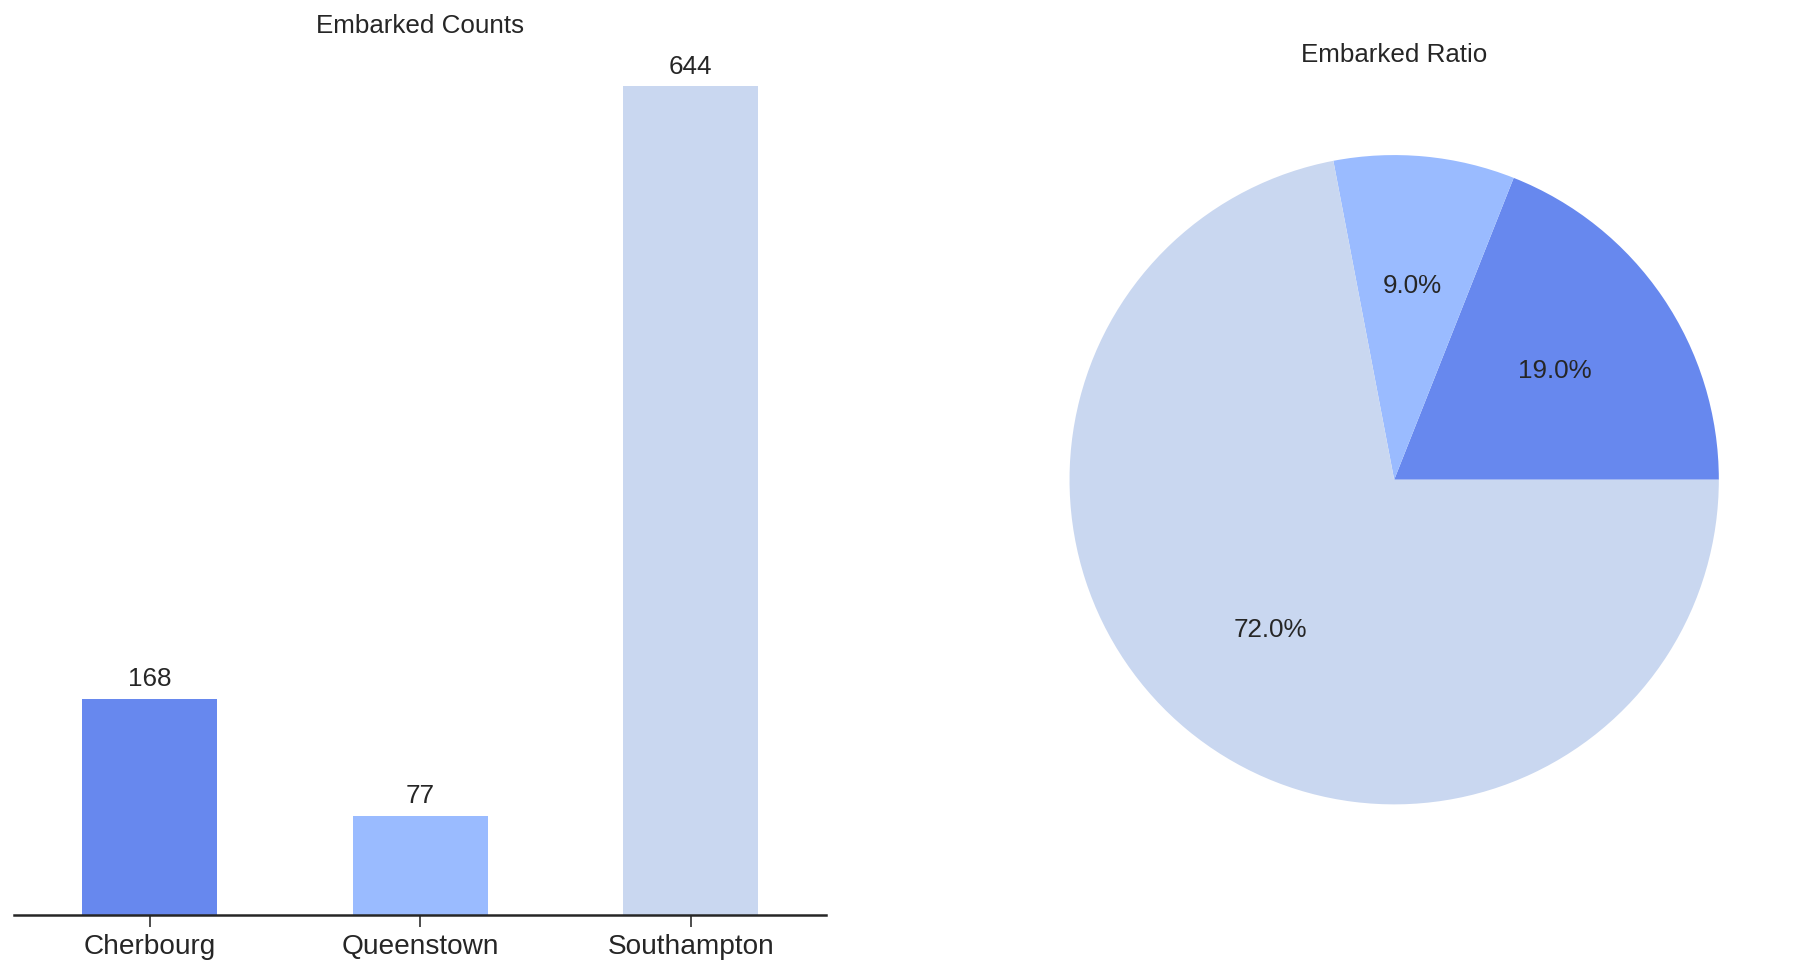

In [11]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

We see that the majority of passengers (644 of 889 - 72%) embarked in Southhampton and only 77 passengers - 9% -  embarked in Queenstown

Let's examine the percentages of passengers that survived ,depending on their port of embarkation.

_We will make functions for this operation since we will use for the other variables as well:_

### Correlation of `Survived` with `Embarked` .

In [12]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)     

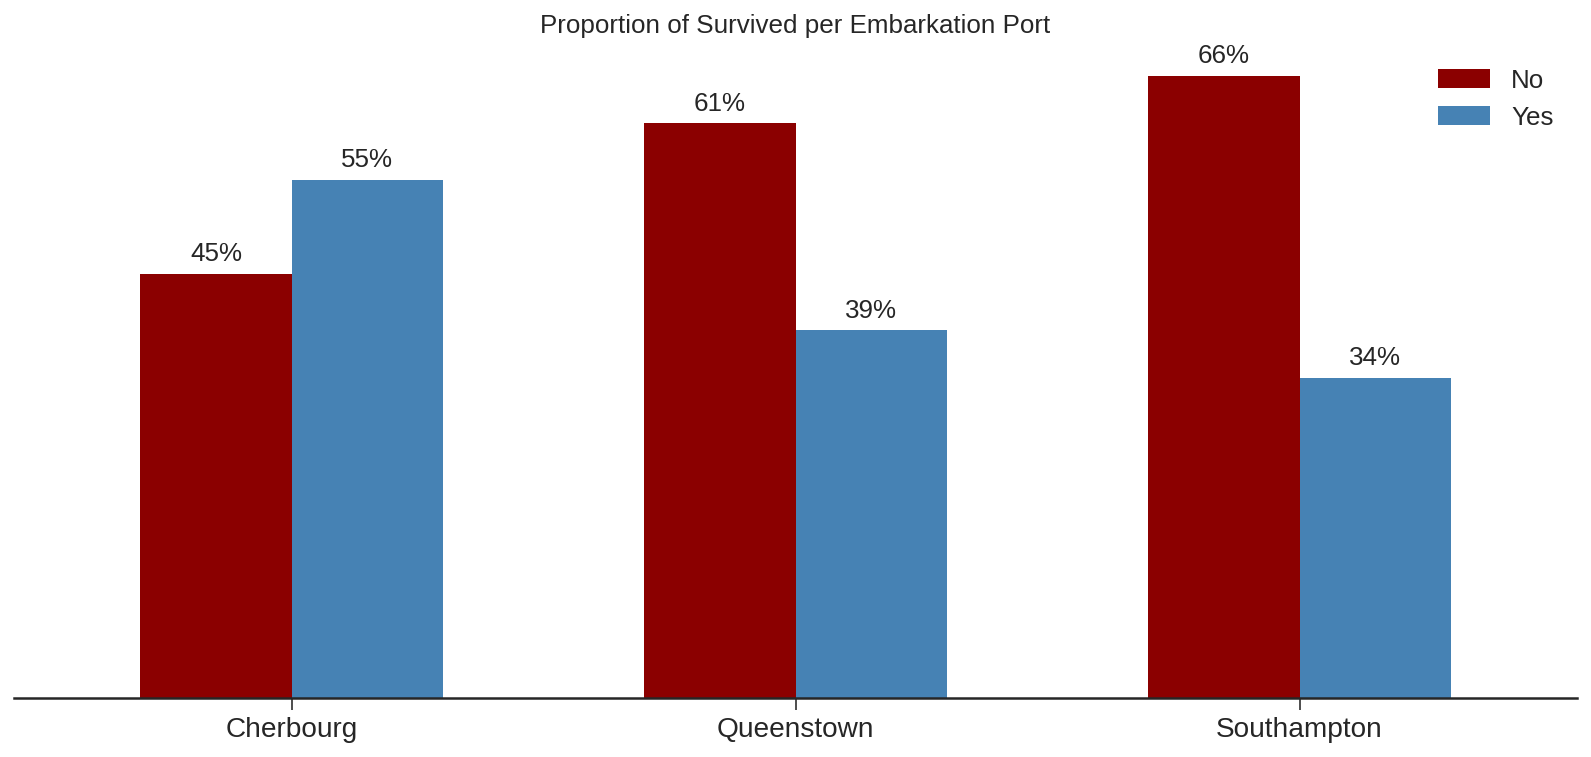

In [13]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')

We see that 55% of passengers embarked in Cherbourg survived compared to 34% and 39% at Southhampton and Queensberg respectively.

This is counter-intuitive at a first look. Investigating deeper into the composition of the passengers regarding their gender and their class may given us more information about this relationship.

### Correlation of `Embarked` with `Pclass`.

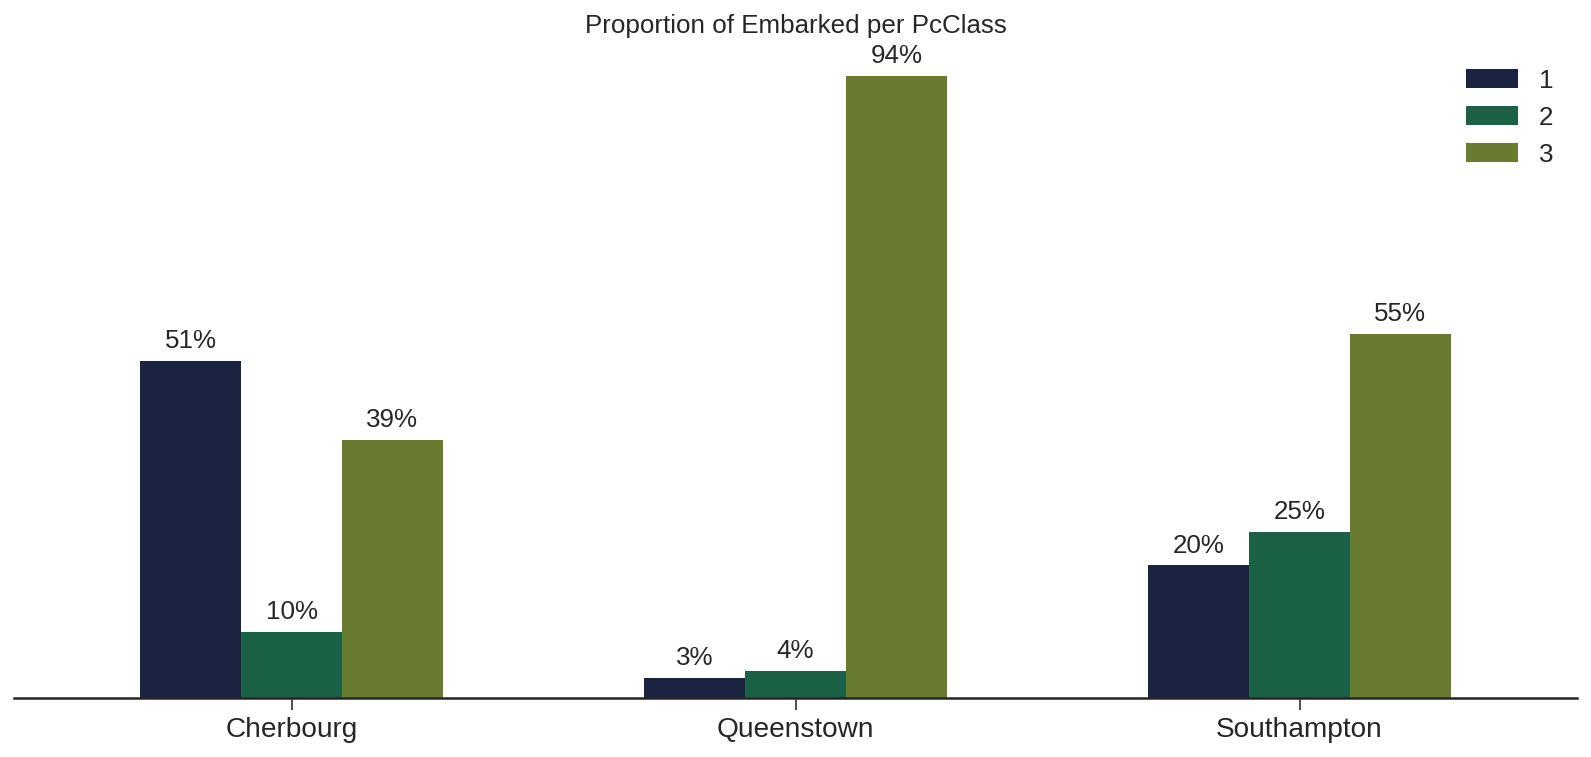

In [14]:
#Calculate percentages of port passengers per Class
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('cubehelix'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])

51% of the passengers embarked in Cherbourg are in the 1st Pclass compared to 20% and 3% respectively for Southhampton and Queenstown.

It looks like the class may play a role in port of embarkation's relationship with survibability.

Let's explore the survivability based on the `Pcclass` variable further.

### Correlation of `Survived` with `Pclass`.

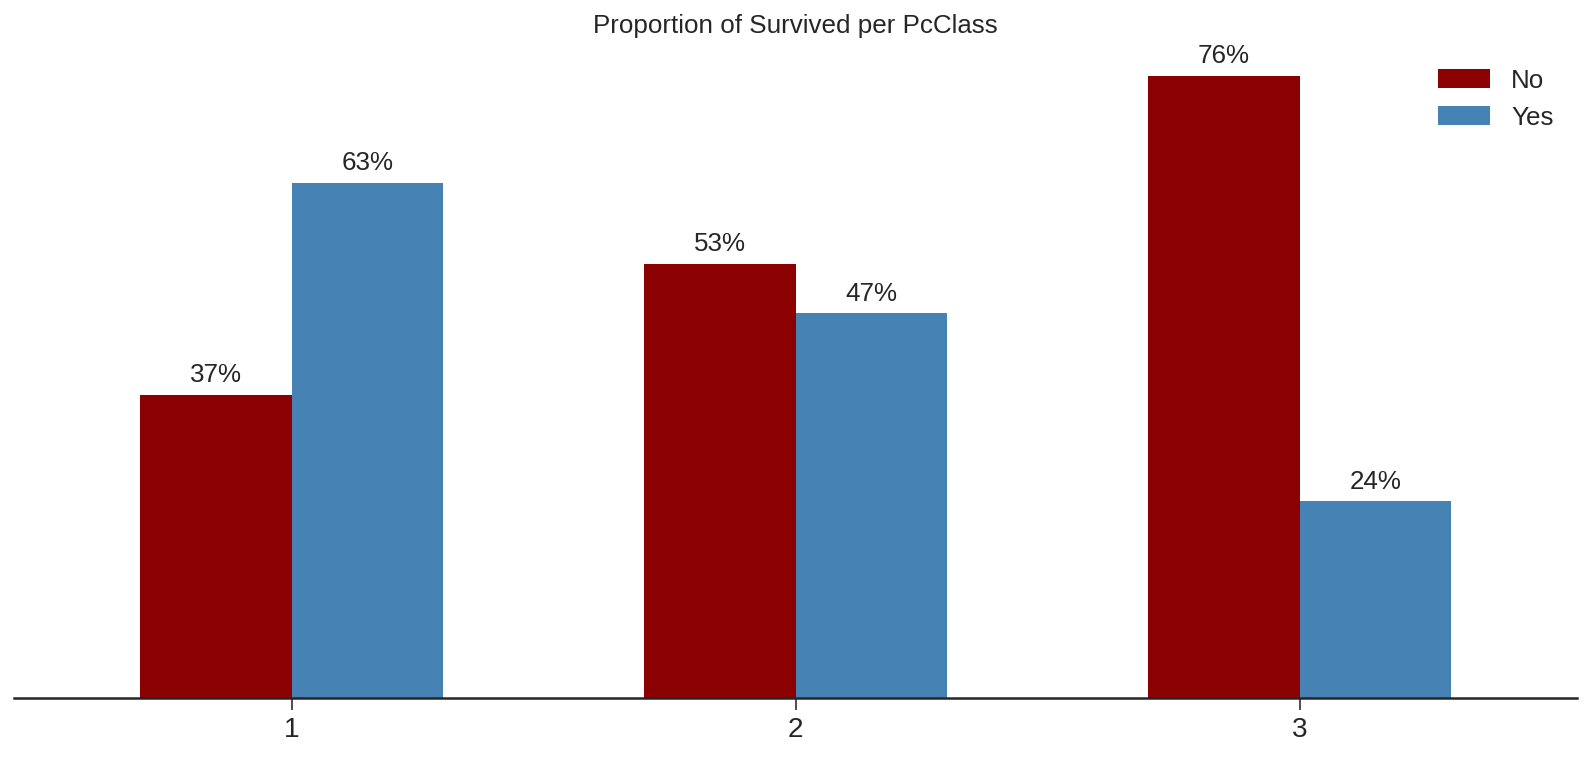

In [15]:
Groupby_TwoCol_Plot(descript,'Pclass', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per PcClass')

63% of 1st class passengers survived compared to 47% and 24% for the 2nd and 3rd class respectively.

Indeed, survivability seems to be correlated with the `Pcclass` and this could be the main factor behind the correlation with the port of embarkation as well.

Let's investigate `Embarked` and the correlation with `Sex`

### Correlation of `Embarked` with `Sex`.

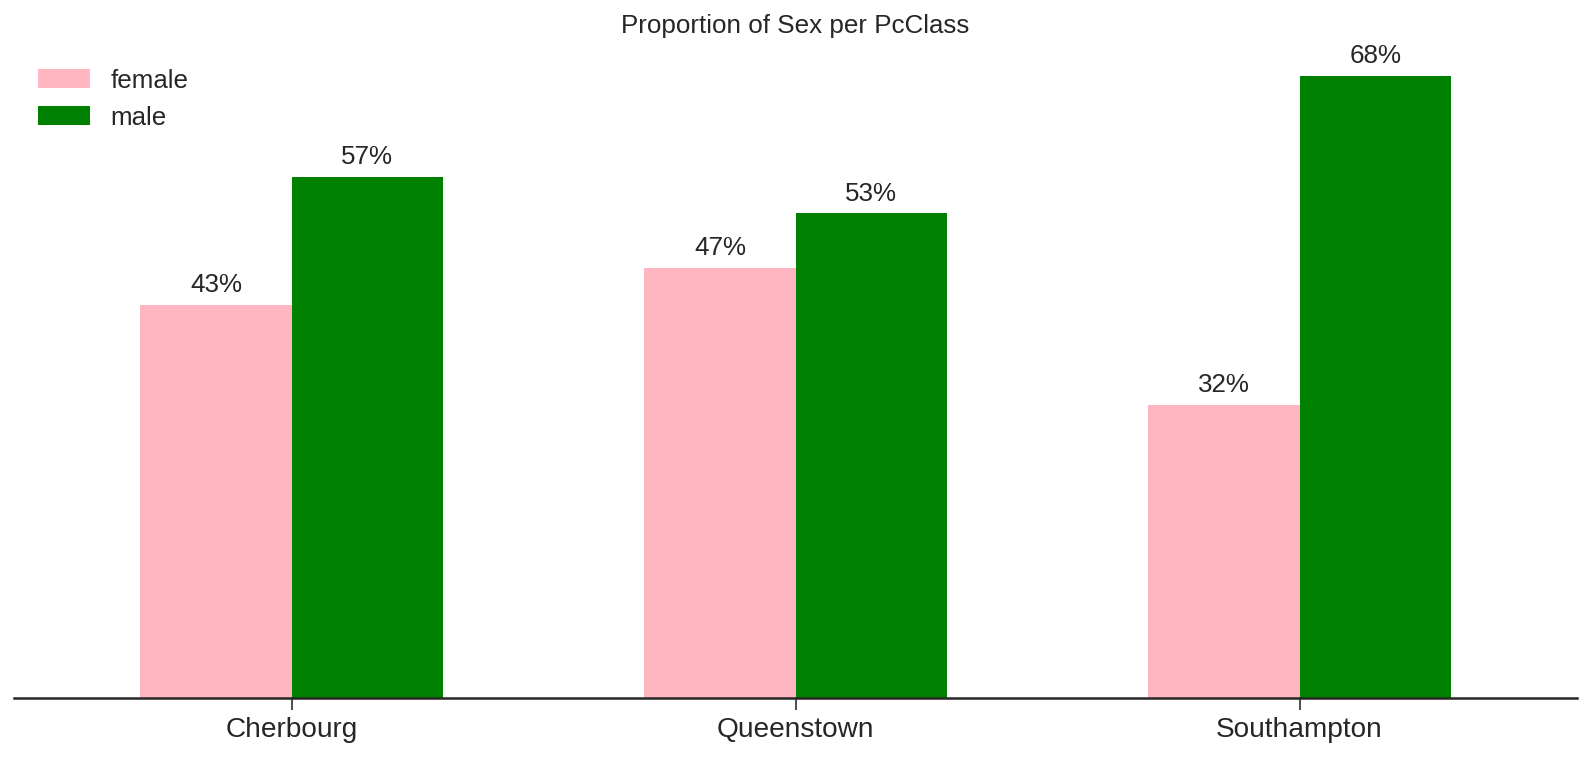

In [16]:
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

There does not seem to be a clear pattern  related to `Sex` that could be contributing to the increased survivability of the Cherbourg passengers.

Let's see the `Sex` composition of the whole population.

### Analysis of the  `Sex` variable.

Total No. of Sex:891


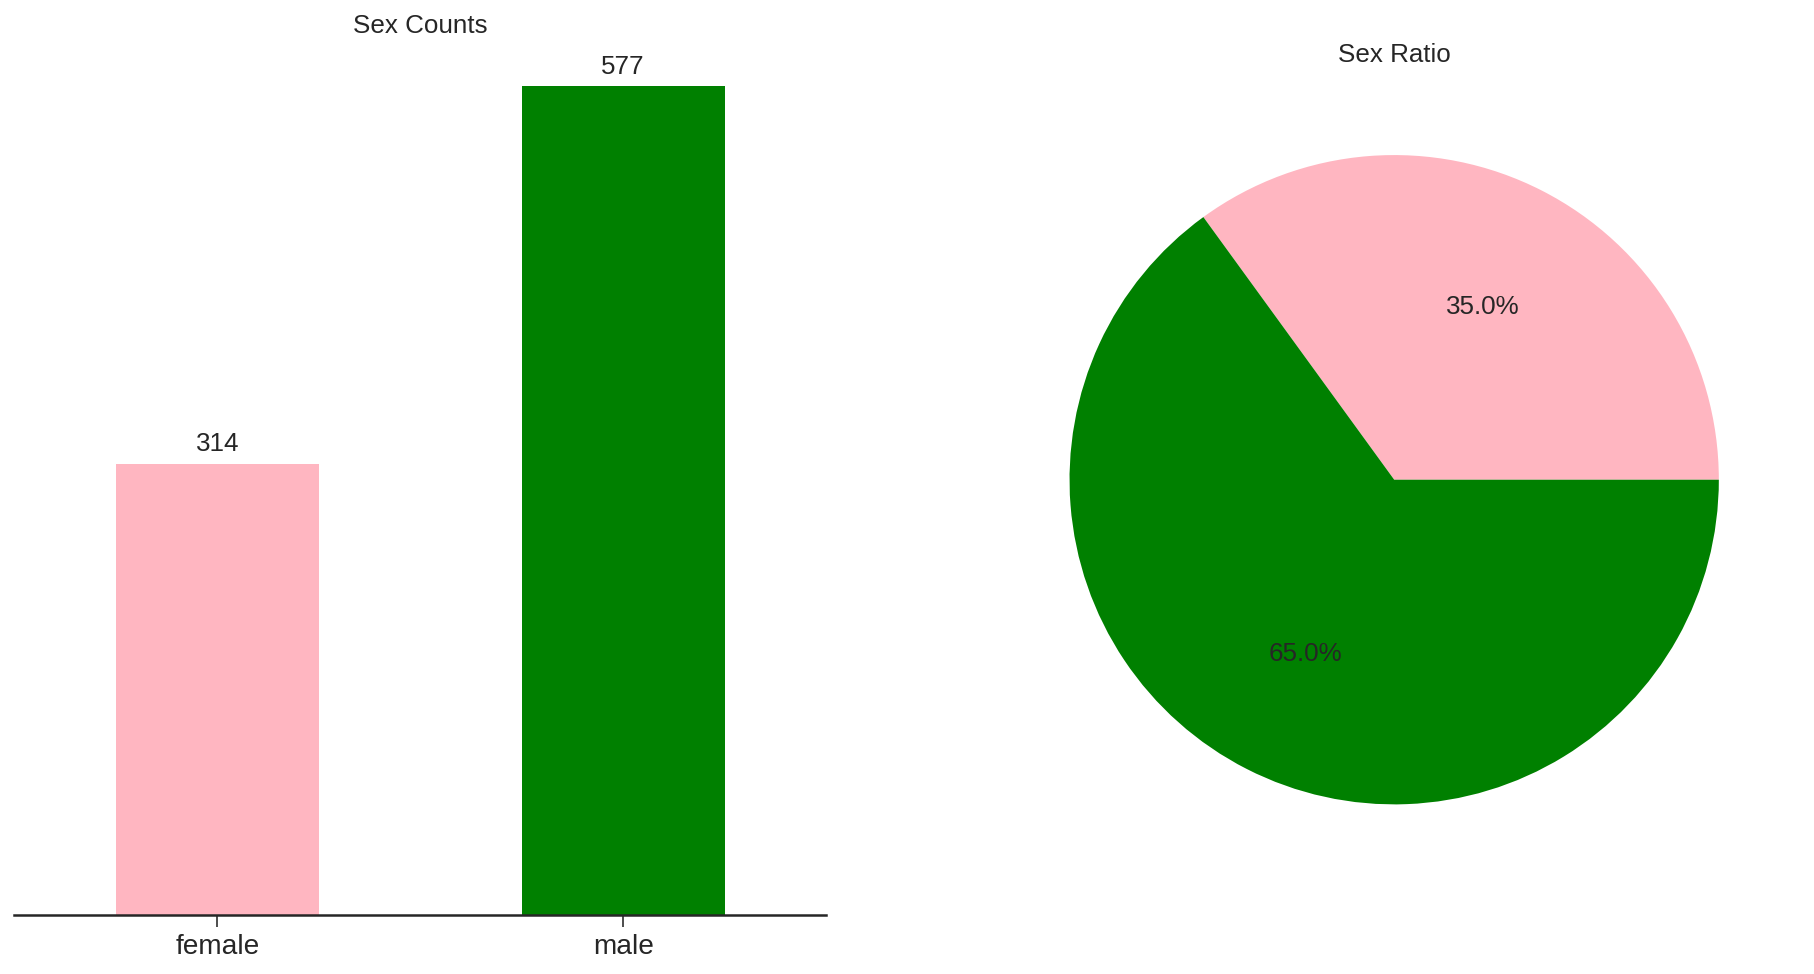

In [17]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('lightpink','green') )

And of the `Pclass`.

### Correlation of  `Sex` with `Pclass`.

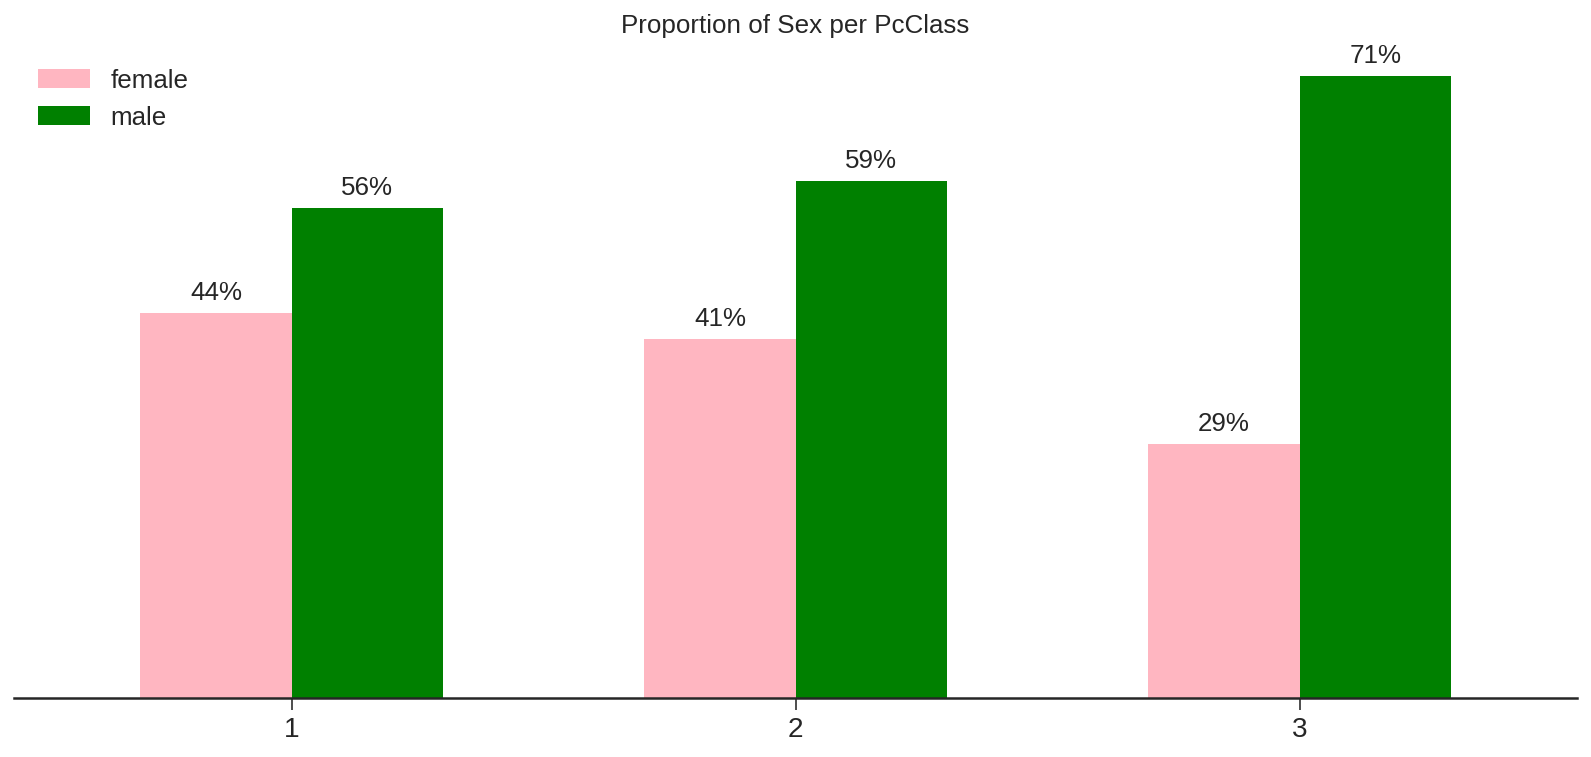

In [18]:
#Calculate percentages of Pclass per Sex
Groupby_TwoCol_Plot(descript,'Pclass', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

We observe that the 3rd class has a higher than average (71 % vs 65%) male percentage.

And the survivability based on `Sex`

### Correlation of  `Sex` with `Survived`

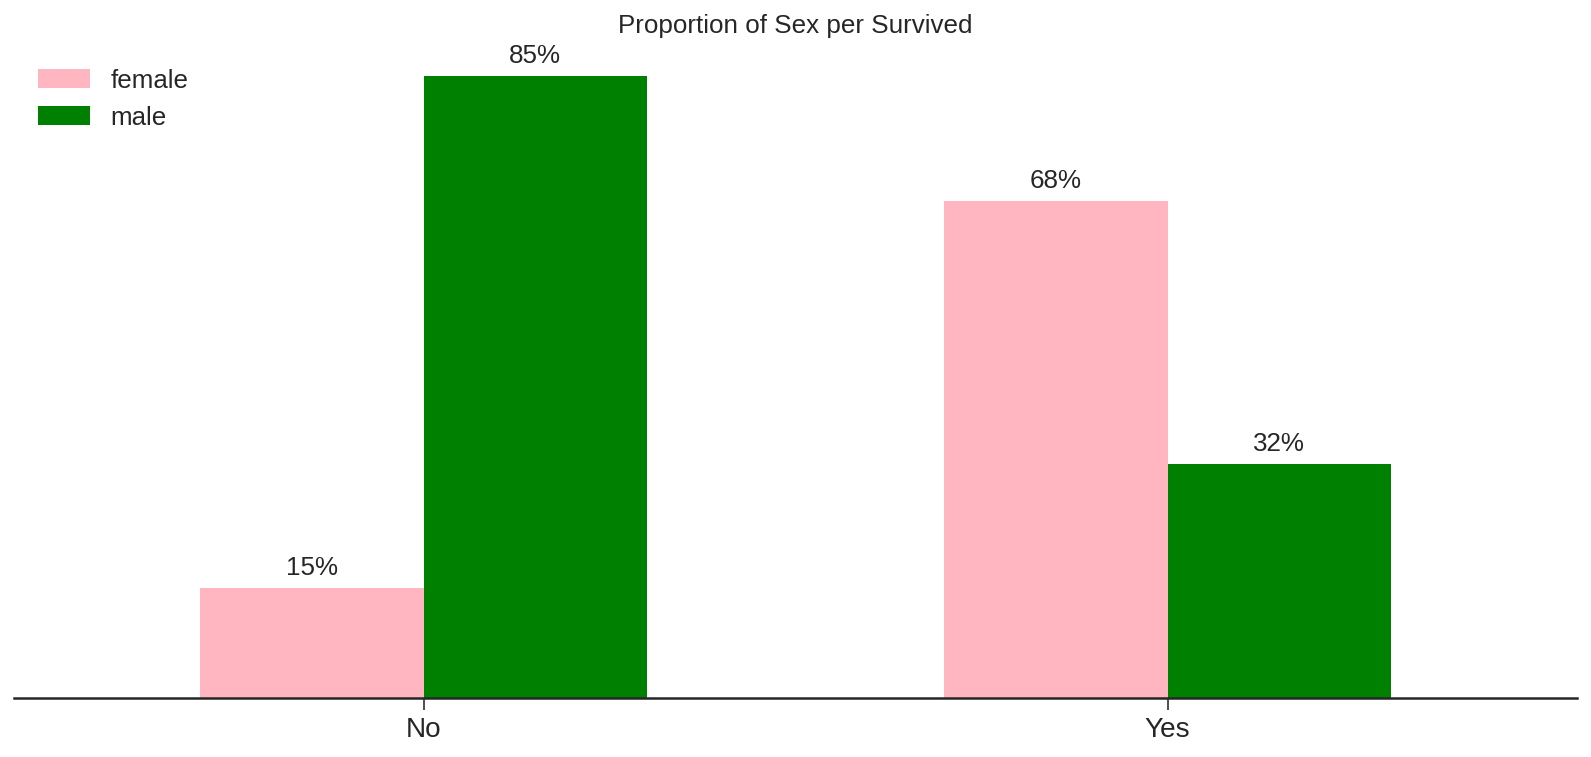

In [19]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper left')

74% of females survived compared to 19% for males. 44% of the 1st class(which had a 65% survivability) comprised of females compared to 29% of the third class (24% survivability).

We can observe this relationship in the following seaborn barplot where the black lines represent confidence intervals built using bootstrapping.  
### Correlation of `Survived` with `Sex` and `Pclass`.


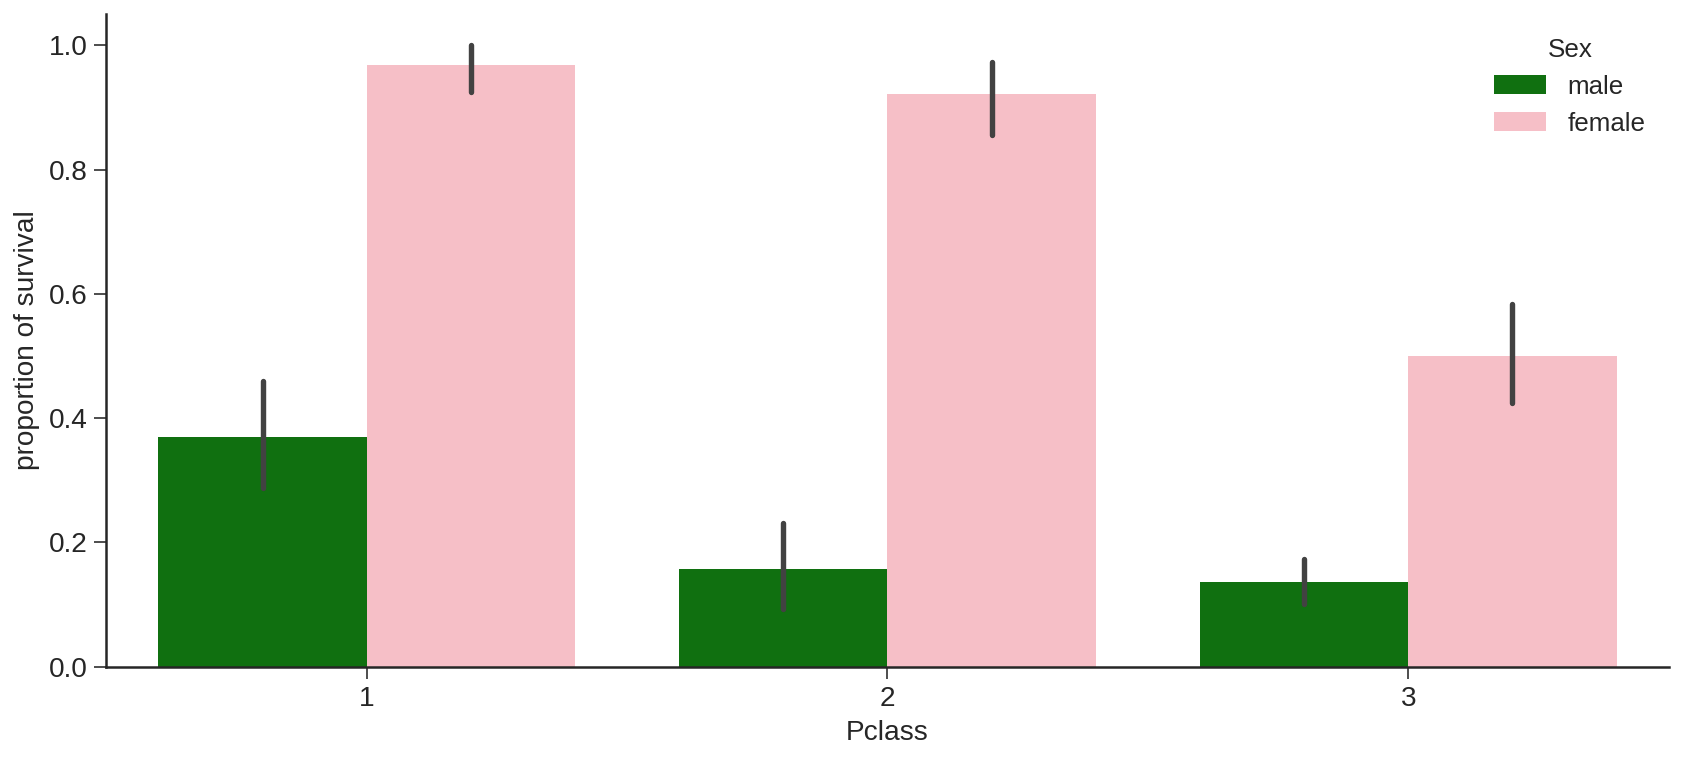

In [20]:
plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('green','lightpink')))
sns.barplot(data=n_titanic_data, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival')
sns.despine(top=True, right=True, left=False, bottom=False);

The proportion of survival for females in the first class was almost 100% in the first class compared to 50% in the third class.

Further statistical tests  need to be conducted but it seems that Age together with the Class have a compound effect on survivability as well as on the correlation of other variables to survivability.

### Analysis of the `Age` variable

Let's examine now the age distribution of the passengers and how `Age` affected their chances of survival.

We will start with a plot of the entire population.

In [21]:
#Make a dataframe for non missing 'Age'values
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())] 

#And replace the survived keys
not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


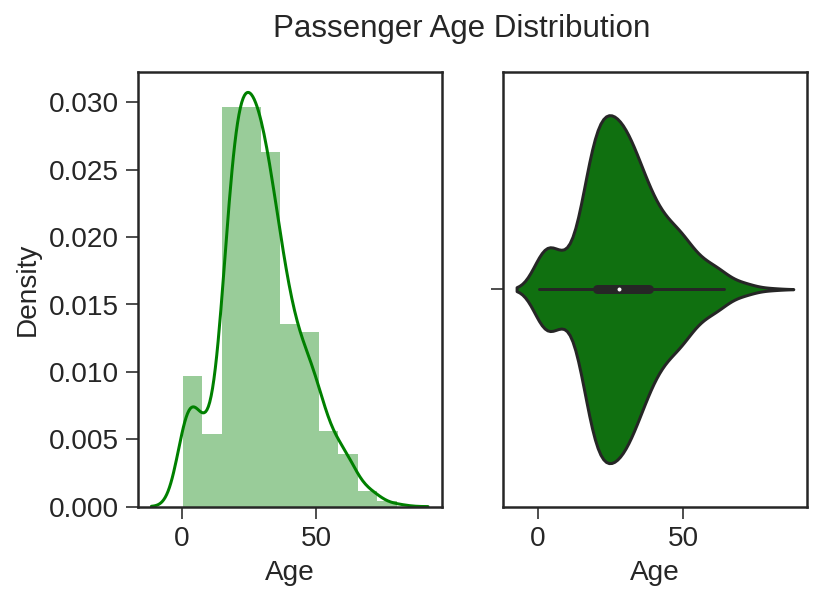

In [23]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [25]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


And the density distribution and boxplot of the `Age` variable depending by survivability.

AttributeError: ignored

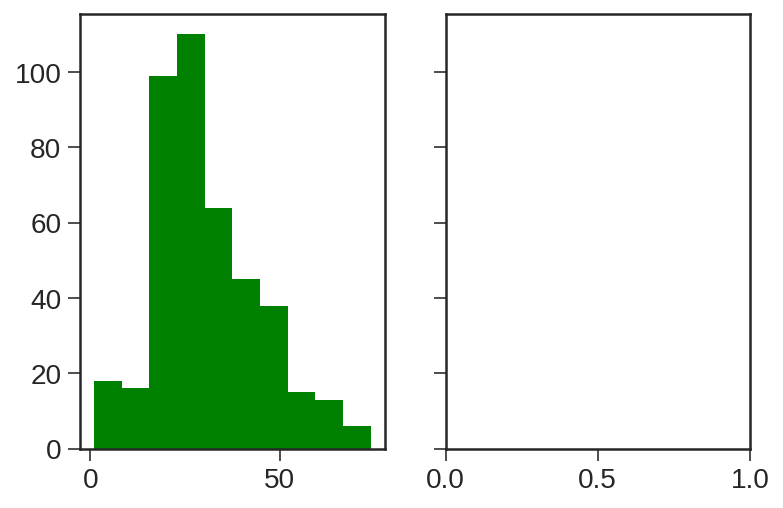

In [26]:
not_missing.hist(column="Age",by="Survived",sharey=True,normed=True)
plt.suptitle('Age Density Distribution grouped by Survived');

We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.
We would like to examine if this was by luck or by some other underlying reason (like the 'Women and Children first' rule).

In [27]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

The not-survived and survived age populations have the following descriptive statistics:

In [28]:
var.loc[:,['Not-survived','Survived']]

,Not-survived,Survived
Sample Size,424.000,290.000
Mean,30.626,28.344
Std. Deviation,14.172,14.951
Min,1.000,0.420
25% Qt,21.000,19.000
Median,28.000,28.000
75% Qt,39.000,36.000
Max,74.000,80.000


## `Survived`- `Age` Statistical Chi-SquaredTest

We will conduct a statistical _chi-squared test_  to establish whether the `Survived` and `Age` variables are related.

Dependent Variable: `Survived`   
Independent Variable: `Age`   

$O_{i}$: the observed value of survived for the given age  
$E_{i}$: the expected value of survived for the given age   

We will test the following hypotheses:

$H_0$: The Null Hypothesis, that there is no relationship between the `Survived` and `Age` variables (independent)  $\rightarrow  O_{i} \neq E_{i}$    

$H_A$: The Alternative Hypothesis, that there is  a relationship between the `Survived` and `Age` variables (dependent) $\rightarrow O_{i} = E_{i}$    

In [29]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins 
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,24,61,143,94,55,28,13,6
Yes,38,41,77,73,34,20,6,1


We will compute the Pearson's Chi-square statistic based on the above observations table:

In [31]:
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:17.42772160585894
dof:7
p:0.014836878112813482


__For a=.05 and 7 degrees of freedom, p is smaller than 0.05 and we therefore reject the Null-Hypothesis and accept that `Survived` and `Age` are dependent variables and that there is indeed a relationship between age and survivability.__

Further statistical tests can be conducted to explore in more detail their relationship and correlation.

### Note

- All conclusions above are tentative and and subject to further investigation and statistical tests.

- The missing Age values could be adding an undefined bias to our hypothesis test and conclusions.

### References/Sources

[1]<a name='[1]'></a>:<https://discussions.udacity.com/t/help-predicting-missing-age-values-in-titanic-dataset/194349/2>   
[2]<a name='[2]'></a>:<https://discussions.udacity.com/t/missing-age-titanic-data/165798/2>   
[3]<a name='[3]'></a>:<http://www.stat.columbia.edu/~gelman/arm/missing.pdf>  
[4]<a name='[4]'></a>:<http://www.ling.upenn.edu/~clight/chisquared.htm>
[5]<a name='[5]'></a>:<http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots>   
[6]<a name='[6]'>: Invaluable Udacity Project Reviewer Feedback</a>
